In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [2]:
log_clf = LogisticRegression()
svm_clf = SVC()
rnd_clf = RandomForestClassifier()

In [3]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf), 
        ('rf', rnd_clf), 
        ('svc', svm_clf),
    ],
    voting='hard',
)

In [4]:
from sklearn.datasets import load_iris

In [30]:
from sklearn.datasets import make_moons

In [61]:
X, y = make_moons(500, noise=0.3, random_state=42)

In [62]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [68]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.888
SVC 0.896
VotingClassifier 0.904


In [73]:
svm_clf = SVC(probability=True)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', log_clf), 
        ('rf', rnd_clf), 
        ('svc', svm_clf),
    ],
    voting='soft',
)

In [74]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.928


## Bagging and Pasting

In [75]:
from sklearn.ensemble import BaggingClassifier

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, 
    bootstrap=True, # Bagging, if set to False, it means Pasting
    n_jobs=-1
)

In [78]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1)

In [79]:
y_pred = bag_clf.predict(X_test)

In [80]:
accuracy_score(y_test, y_pred)

0.912

In [81]:
pasting_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, 
    bootstrap=False, 
    n_jobs=-1
)

In [82]:
pasting_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False,
                  max_samples=100, n_estimators=500, n_jobs=-1)

In [83]:
y_pred = pasting_clf.predict(X_test)

In [84]:
accuracy_score(y_test, y_pred)

0.928

In [85]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    bootstrap=True, n_jobs=-1, 
    oob_score=True
)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1, oob_score=True)

In [86]:
bag_clf.oob_score_

0.8906666666666667

In [87]:
from sklearn.metrics import accuracy_score

In [88]:
y_pred = bag_clf.predict(X_test)

In [89]:
accuracy_score(y_test, y_pred)

0.88

In [90]:
bag_clf.oob_decision_function_

array([[0.41116751, 0.58883249],
       [0.32258065, 0.67741935],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.10382514, 0.89617486],
       [0.35151515, 0.64848485],
       [0.00571429, 0.99428571],
       [0.98461538, 0.01538462],
       [0.95187166, 0.04812834],
       [0.80571429, 0.19428571],
       [0.01030928, 0.98969072],
       [0.68983957, 0.31016043],
       [0.84795322, 0.15204678],
       [0.98492462, 0.01507538],
       [0.05263158, 0.94736842],
       [0.        , 1.        ],
       [0.98360656, 0.01639344],
       [0.94329897, 0.05670103],
       [0.99421965, 0.00578035],
       [0.01041667, 0.98958333],
       [0.34054054, 0.65945946],
       [0.91878173, 0.08121827],
       [1.        , 0.        ],
       [0.96721311, 0.03278689],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.58730159, 0.41269841],
       [0.

## Random Patches method
Instance sampling + Feature sampling


## Random Subspace method
Feature sampling (over all training dataset)

## Random forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [93]:
y_pred = rnd_clf.predict(X_test)

In [94]:
accuracy_score(y_test, y_pred)

0.912

In [95]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter='random', max_leaf_nodes=16),
    n_estimators=500,
    max_samples=1.0,
    bootstrap=True,
    n_jobs=-1
)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_leaf_nodes=16,
                                                        splitter='random'),
                  n_estimators=500, n_jobs=-1)

In [96]:
y_pred_bag = bag_clf.predict(X_test)

In [97]:
accuracy_score(y_test, y_pred_bag)

0.904

In [99]:
import numpy as np

In [100]:
np.sum(y_pred_bag != y_pred)

1

In [101]:
from sklearn.ensemble import ExtraTreesClassifier

In [102]:
et_clf = ExtraTreesClassifier(n_estimators=500, n_jobs=-1)

In [103]:
et_clf.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=500, n_jobs=-1)

In [106]:
iris = load_iris()
X = iris.data[:,:]
y = iris.target[:]

In [107]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(X, y)

RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [108]:
rnd_clf.feature_importances_

array([0.10915943, 0.02363308, 0.4349855 , 0.43222199])

In [109]:
for name, score in zip(iris['feature_names'], rnd_clf.feature_importances_):
    print(f'Feature {name}: {score}')

Feature sepal length (cm): 0.1091594263454736
Feature sepal width (cm): 0.023633082005447843
Feature petal length (cm): 0.43498550355421495
Feature petal width (cm): 0.43222198809486373


## AdaBoost

In [110]:
from sklearn.ensemble import AdaBoostClassifier

SAMME: Stagewise Additive Modeling using a Multiclass Exponential loss function

In [111]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=300,
    algorithm='SAMME.R',
    learning_rate=0.5
)

In [112]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=300)

## Gradient Boosting

In [114]:
from sklearn.tree import DecisionTreeRegressor

In [118]:
X = np.linspace(-10, 10, 100)
y = X ** 2 + 5 * X - 1 + np.random.randn(100) * 5
X.shape, y.shape

((100,), (100,))

In [119]:
import matplotlib.pyplot as plt
%matplotlib inline

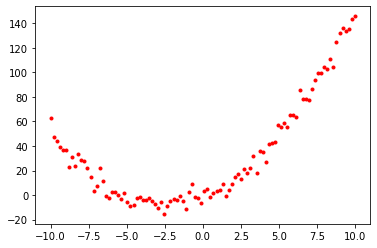

In [120]:
plt.plot(X, y, 'r.')

In [124]:
X = X.reshape(-1,1)
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2)

In [125]:
y2 = y - tree_reg1.predict(X)

In [126]:
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2)

In [127]:
y3 = y2 - tree_reg2.predict(X)

In [128]:
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2)

In [113]:
from sklearn.ensemble import GradientBoostingRegressor

In [129]:
gb_reg = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gb_reg.fit(X, y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

## Early stopping

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [132]:
X_train, X_val, y_train, y_val = train_test_split(X, y)

In [133]:
gb_reg = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1)
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=200)

In [134]:
errors = [
    mean_squared_error(y_val, y_pred) for y_pred in gb_reg.staged_predict(X_val)
]

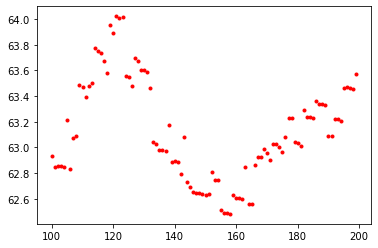

In [141]:
plt.plot(np.arange(len(errors))[-100:], errors[-100:], 'r.')

In [142]:
best_n = np.argmin(errors) + 1 
best_n

84

In [143]:
gb_reg = GradientBoostingRegressor(max_depth=2, n_estimators=best_n, learning_rate=0.1)
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=84)

In [144]:
gb_reg = GradientBoostingRegressor(max_depth=2, n_estimators=best_n, learning_rate=0.1, warm_start=True)

min_val_error = float('inf')
non_decreasing_count = 0
for n_estimator in range(1,200):
    gb_reg.n_estimators = n_estimator
    gb_reg.fit(X_train, y_train)
    y_pred = gb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    
    if val_error < min_val_error:
        min_val_error = val_error
        non_decreasing_count = 0
    else:
        non_decreasing_count += 1
        if (non_decreasing_count >= 5):
            break # early stopping

In [145]:
n_estimator

53

## XGBoost

In [147]:
import xgboost as xgb

In [148]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_val = xgb_reg.predict(X_val)

In [149]:
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train, 
            eval_set=[(X_val, y_val)], early_stopping_rounds=5
           )

[0]	validation_0-rmse:45.19752
[1]	validation_0-rmse:34.80553
[2]	validation_0-rmse:27.29507
[3]	validation_0-rmse:20.94806
[4]	validation_0-rmse:16.23381
[5]	validation_0-rmse:12.69590
[6]	validation_0-rmse:10.03574
[7]	validation_0-rmse:7.97120
[8]	validation_0-rmse:6.38110
[9]	validation_0-rmse:5.23001
[10]	validation_0-rmse:4.39019
[11]	validation_0-rmse:3.80802
[12]	validation_0-rmse:3.31946
[13]	validation_0-rmse:2.93248
[14]	validation_0-rmse:2.58471
[15]	validation_0-rmse:2.32417
[16]	validation_0-rmse:2.13346
[17]	validation_0-rmse:1.94976
[18]	validation_0-rmse:1.84143
[19]	validation_0-rmse:1.71557
[20]	validation_0-rmse:1.64779
[21]	validation_0-rmse:1.55526
[22]	validation_0-rmse:1.51592
[23]	validation_0-rmse:1.47396
[24]	validation_0-rmse:1.41065
[25]	validation_0-rmse:1.29107
[26]	validation_0-rmse:1.25762
[27]	validation_0-rmse:1.23383
[28]	validation_0-rmse:1.16193
[29]	validation_0-rmse:1.12183
[30]	validation_0-rmse:1.08855
[31]	validation_0-rmse:1.05991
[32]	valida

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)